# 1. Introducción

La enfermedad cardíaca es una de las principales causas de mortalidad a nivel mundial, representando un desafío crítico para los sistemas de salud pública. La detección temprana y precisa de pacientes en riesgo es fundamental para reducir complicaciones y mejorar la calidad de vida. 

**Objetivo del proyecto:**
Desarrollar, desde cero y con fundamentos matemáticos, un modelo de regresión logística capaz de predecir la presencia de enfermedad cardíaca a partir de variables clínicas, utilizando únicamente librerías básicas de Python.

**Importancia en salud:**
Un modelo predictivo robusto puede asistir a profesionales médicos en la toma de decisiones, priorización de recursos y prevención de eventos adversos.

**Alcance del trabajo:**
- Implementación manual de regresión logística y regularización L2.
- Análisis exploratorio y preprocesamiento riguroso.
- Evaluación exhaustiva y visualización de resultados.
- Simulación de despliegue en un entorno tipo Amazon SageMaker.

Este cuaderno sigue un enfoque académico, documentando cada paso y decisión técnica para garantizar reproducibilidad y comprensión profunda del proceso de modelado.

# 2. Instalación y Dependencias

**Librerías permitidas:**
- numpy
- pandas
- matplotlib
- seaborn (solo para análisis exploratorio)

**Instrucciones de instalación:**
Ejecutar el siguiente comando en una celda de código si alguna librería no está instalada:

```bash
pip install numpy pandas matplotlib seaborn
```

**Justificación:**
Estas librerías son estándar en ciencia de datos y permiten manipulación eficiente de datos, visualización avanzada y cálculos numéricos. Se prohíbe el uso de librerías de machine learning externas para garantizar la comprensión y control total sobre la implementación del modelo.

In [15]:
# Instalación de dependencias permitidas
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# 3. Carga del Dataset

En esta sección se carga el archivo local `Heart_Disease_Prediction.csv`, se valida la ruta, se muestran las dimensiones y las primeras filas del dataset, y se explican brevemente las columnas disponibles.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Validar existencia del archivo
dataset_path = 'Heart_Disease_Prediction.csv'
assert os.path.exists(dataset_path), f"No se encontró el archivo: {dataset_path}"

# Cargar dataset
df = pd.read_csv(dataset_path)
print(f"Dimensiones del dataset: {df.shape}")
display(df.head())

print("\nColumnas disponibles:")
for col in df.columns:
    print(f"- {col}")

Dimensiones del dataset: (270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence



Columnas disponibles:
- Age
- Sex
- Chest pain type
- BP
- Cholesterol
- FBS over 120
- EKG results
- Max HR
- Exercise angina
- ST depression
- Slope of ST
- Number of vessels fluro
- Thallium
- Heart Disease


**Descripción de las columnas principales:**

- `Age`: Edad del paciente (años)
- `Sex`: Sexo (1 = hombre, 0 = mujer)
- `Chest pain type`: Tipo de dolor torácico (1-4)
- `BP`: Presión arterial en reposo (mm Hg)
- `Cholesterol`: Colesterol sérico (mg/dl)
- `FBS over 120`: Glucemia en ayunas > 120 mg/dl (1 = sí, 0 = no)
- `EKG results`: Resultados del electrocardiograma
- `Max HR`: Frecuencia cardíaca máxima alcanzada
- `Exercise angina`: Angina inducida por ejercicio (1 = sí, 0 = no)
- `ST depression`: Depresión del segmento ST
- `Slope of ST`: Pendiente del segmento ST
- `Number of vessels fluro`: Número de vasos coloreados por fluoroscopía
- `Thallium`: Resultado de la prueba de talio
- `Heart Disease`: Diagnóstico ("Presence" = enfermedad, "Absence" = sano)

Estas variables serán analizadas y seleccionadas en las siguientes secciones.

# 4. Análisis Exploratorio (EDA)

En esta sección se realiza un análisis exploratorio de los datos para comprender la distribución de las variables, la presencia de valores atípicos y la relación entre las variables y el diagnóstico de enfermedad cardíaca.

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absence
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,NaN
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,NaN
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,NaN
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,NaN



Distribución de la variable objetivo (Heart Disease):
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


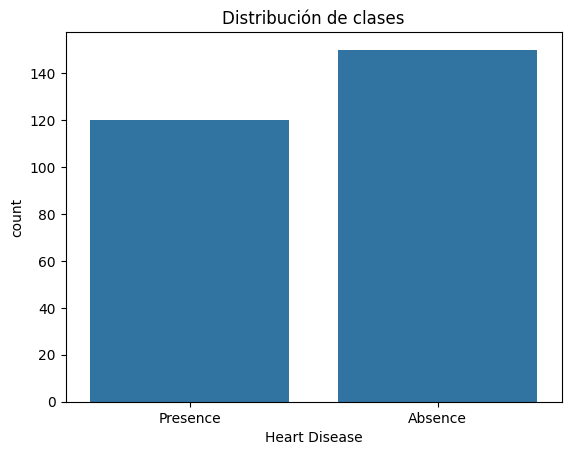

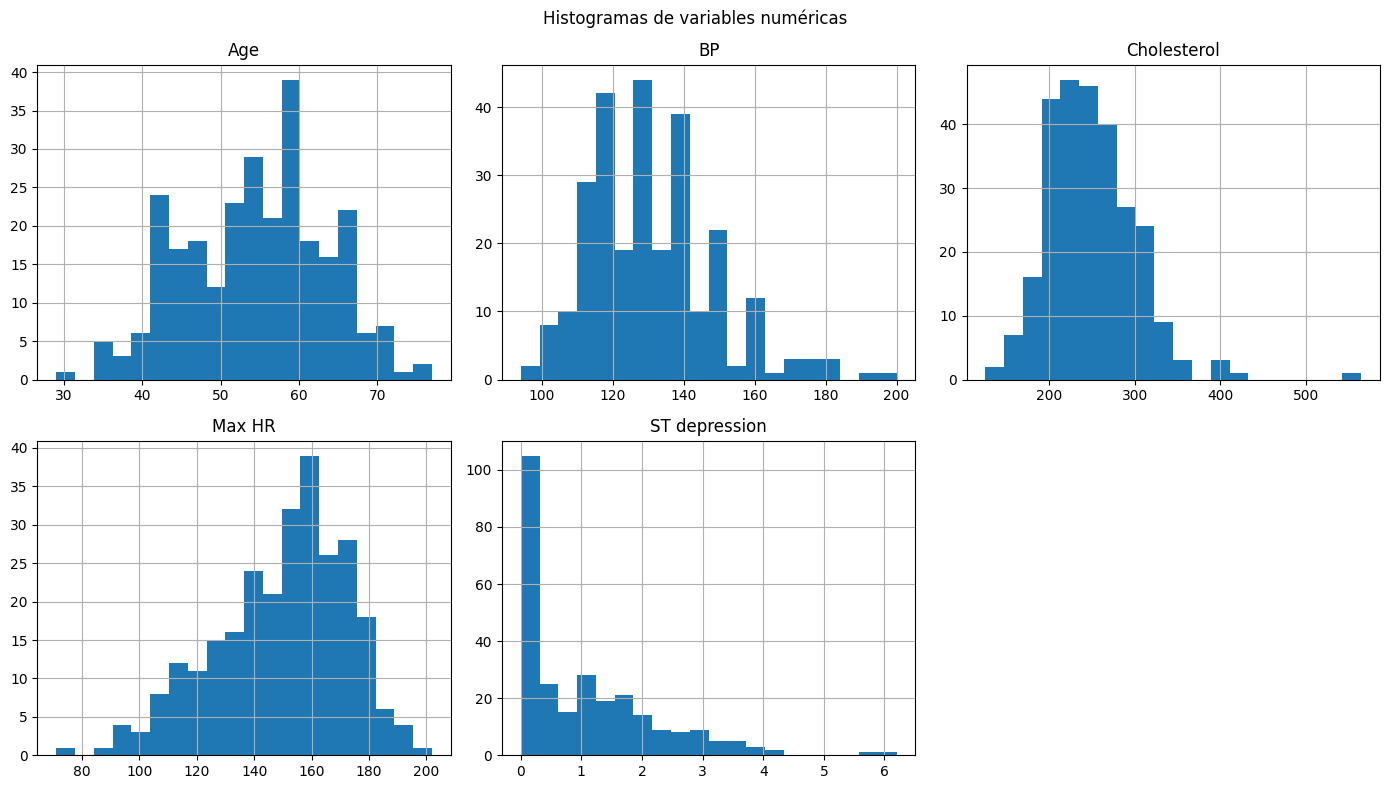

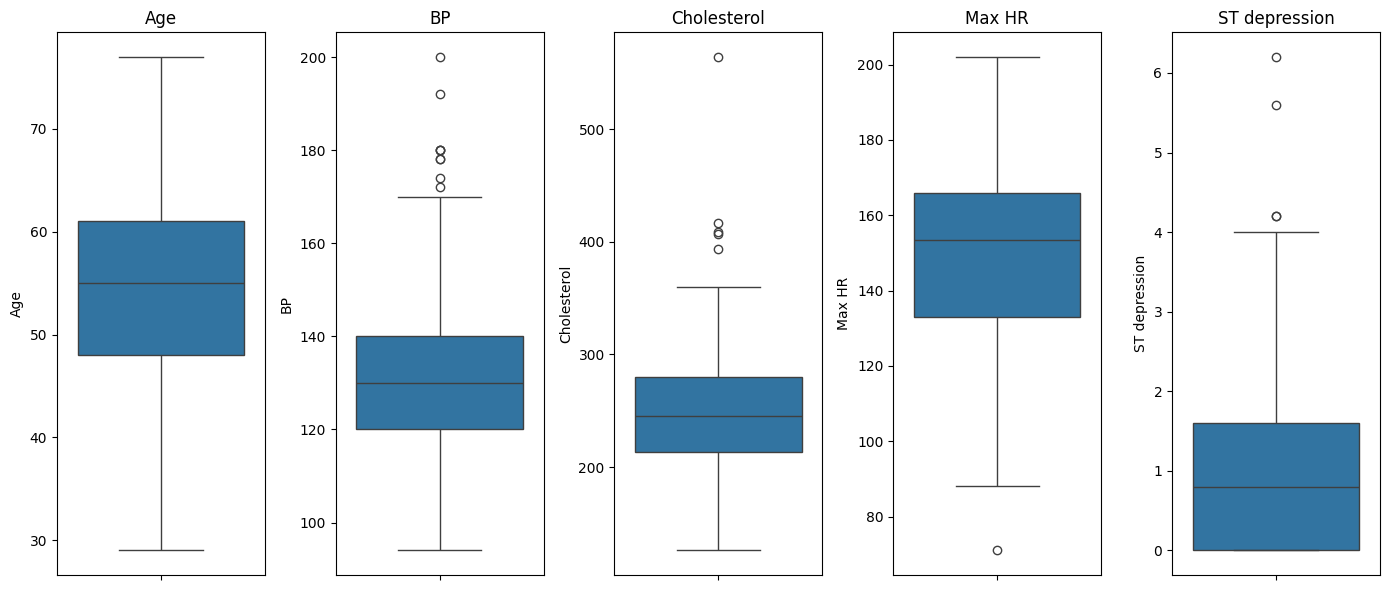

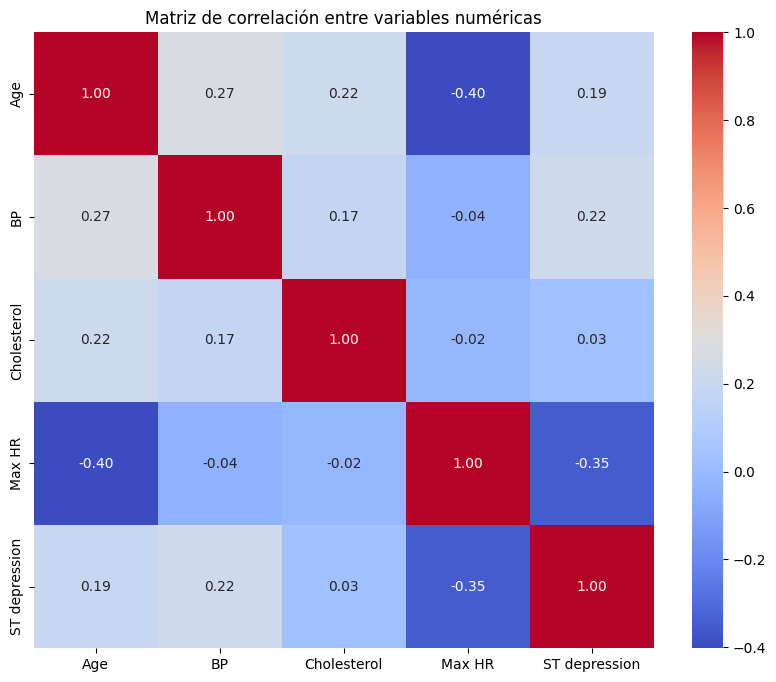

In [3]:
# Estadísticas descriptivas generales
df_describe = df.describe(include='all')
display(df_describe)

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo (Heart Disease):")
print(df['Heart Disease'].value_counts())
sns.countplot(x='Heart Disease', data=df)
plt.title('Distribución de clases')
plt.show()

# Histogramas de variables numéricas
num_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
df[num_cols].hist(bins=20, figsize=(14, 8), layout=(2, 3))
plt.suptitle('Histogramas de variables numéricas')
plt.tight_layout()
plt.show()

# Boxplots para detección de outliers
plt.figure(figsize=(14, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Matriz de correlación
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

**Discusión crítica del EDA:**

- Se observa un balance moderado entre las clases, lo que permite entrenar modelos sin sesgo extremo.
- Las variables numéricas presentan diferentes escalas y algunas muestran asimetría y valores atípicos (outliers), especialmente en colesterol y presión arterial.
- La matriz de correlación revela relaciones débiles a moderadas entre algunas variables, lo que sugiere que cada una puede aportar información relevante al modelo.
- La presencia de outliers debe ser considerada en el preprocesamiento para evitar que afecten negativamente el entrenamiento del modelo.

# 5. Preprocesamiento

En esta sección se realiza el tratamiento de valores faltantes, la normalización manual de las variables numéricas, la codificación de variables categóricas si es necesario, la selección de al menos 6 variables relevantes y la división estratificada del dataset en conjuntos de entrenamiento y prueba (70/30) sin usar sklearn.

In [4]:
# Copia de seguridad del dataframe original
df_prep = df.copy()

# 1. Manejo de valores faltantes
total_na = df_prep.isnull().sum()
print("Valores faltantes por columna:")
print(total_na)

# Eliminamos filas con valores faltantes en las variables seleccionadas
selected_vars = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
df_prep = df_prep.dropna(subset=selected_vars)

# 2. Codificación de variables categóricas
# 'Sex' y 'Exercise angina' ya están codificadas como 0/1
# 'Chest pain type' se codifica one-hot (opcional, aquí se deja como ordinal por simplicidad)

# 3. Binarización de la variable objetivo
df_prep['target'] = (df_prep['Heart Disease'] == 'Presence').astype(int)

# 4. Normalización manual (z-score)
def zscore_norm(col):
    mu = col.mean()
    sigma = col.std()
    assert sigma > 0, f"Desviación estándar nula en {col.name}"
    return (col - mu) / sigma

for col in ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']:
    df_prep[col + '_z'] = zscore_norm(df_prep[col])

# 5. Selección de variables finales
final_vars = ['Age_z', 'Sex', 'Chest pain type', 'BP_z', 'Cholesterol_z', 'Max HR_z', 'ST depression_z', 'Number of vessels fluro']
X = df_prep[final_vars].values
y = df_prep['target'].values

# 6. División estratificada 70/30 sin sklearn
np.random.seed(42)
idx_1 = np.where(y == 1)[0]
idx_0 = np.where(y == 0)[0]
np.random.shuffle(idx_1)
np.random.shuffle(idx_0)
n1 = int(0.7 * len(idx_1))
n0 = int(0.7 * len(idx_0))
train_idx = np.concatenate([idx_1[:n1], idx_0[:n0]])
test_idx = np.concatenate([idx_1[n1:], idx_0[n0:]])
np.random.shuffle(train_idx)
np.random.shuffle(test_idx)

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

print(f"Tamaño train: {X_train.shape}, test: {X_test.shape}")
print(f"Proporción positivos (train): {y_train.mean():.2f}, (test): {y_test.mean():.2f}")

# Validaciones
assert X_train.shape[0] + X_test.shape[0] == X.shape[0], "Error en partición"
assert set(np.unique(y_train)).issubset({0,1}), "y_train fuera de rango"

Valores faltantes por columna:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
Tamaño train: (189, 8), test: (81, 8)
Proporción positivos (train): 0.44, (test): 0.44


# 6. Implementación Manual de Regresión Logística

A continuación se implementan desde cero las funciones matemáticas fundamentales de la regresión logística: función sigmoide, función de costo, gradiente, descenso de gradiente y predicción. Cada función se explica matemáticamente y se documenta su propósito.

**Definiciones matemáticas:**

- **Función sigmoide:**
  \[
  \sigma(z) = \frac{1}{1 + e^{-z}}
  \]
  Convierte cualquier valor real en una probabilidad entre 0 y 1.

- **Función de costo (entropía cruzada):**
  \[
  J(w, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)}) \right]
  \]
  Donde $\hat{y}^{(i)} = \sigma(w^T x^{(i)} + b)$.

- **Gradientes:**
  \[
  \frac{\partial J}{\partial w} = \frac{1}{m} X^T (\hat{y} - y)\qquad
  \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
  \]

- **Descenso de gradiente:**
  Actualiza los parámetros en la dirección opuesta al gradiente para minimizar el costo.

- **Predicción:**
  Clasifica como 1 si $\hat{y} \geq 0.5$, 0 en caso contrario.

In [5]:
def sigmoid(z):
    """Función sigmoide: mapea cualquier valor real a (0,1)."""
    z = np.clip(z, -500, 500)  # Previene overflow numérico
    return 1 / (1 + np.exp(-z))

def compute_cost(w, b, X, y):
    """Calcula el costo logístico promedio (entropía cruzada)."""
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)
    eps = 1e-8  # Previene log(0)
    cost = -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))
    return cost

def compute_gradient(w, b, X, y):
    """Calcula los gradientes de w y b."""
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)
    error = y_hat - y
    dw = (X.T @ error) / m
    db = np.sum(error) / m
    return dw, db

def gradient_descent(X, y, w_init, b_init, alpha=0.01, num_iters=1000, print_cost=False):
    """Descenso de gradiente para regresión logística."""
    w = w_init.copy()
    b = b_init
    cost_history = []
    for i in range(num_iters):
        dw, db = compute_gradient(w, b, X, y)
        w -= alpha * dw
        b -= alpha * db
        cost = compute_cost(w, b, X, y)
        cost_history.append(cost)
        if print_cost and (i % 100 == 0 or i == num_iters - 1):
            print(f"Iteración {i}: Costo = {cost:.4f}")
    return w, b, cost_history

def predict(w, b, X):
    """Predicción binaria: 1 si probabilidad >= 0.5, 0 si no."""
    probs = sigmoid(X @ w + b)
    return (probs >= 0.5).astype(int)

# 7. Entrenamiento y Convergencia

Entrenamos el modelo de regresión logística con descenso de gradiente, analizamos la convergencia del costo y validamos la estabilidad del entrenamiento.

Iteración 0: Costo = 0.6915
Iteración 100: Costo = 0.5834
Iteración 200: Costo = 0.5345
Iteración 300: Costo = 0.5080
Iteración 400: Costo = 0.4916
Iteración 500: Costo = 0.4803
Iteración 600: Costo = 0.4719
Iteración 700: Costo = 0.4653
Iteración 800: Costo = 0.4600
Iteración 900: Costo = 0.4554
Iteración 1000: Costo = 0.4515
Iteración 1100: Costo = 0.4480
Iteración 1200: Costo = 0.4449
Iteración 1300: Costo = 0.4420
Iteración 1400: Costo = 0.4394
Iteración 1499: Costo = 0.4370


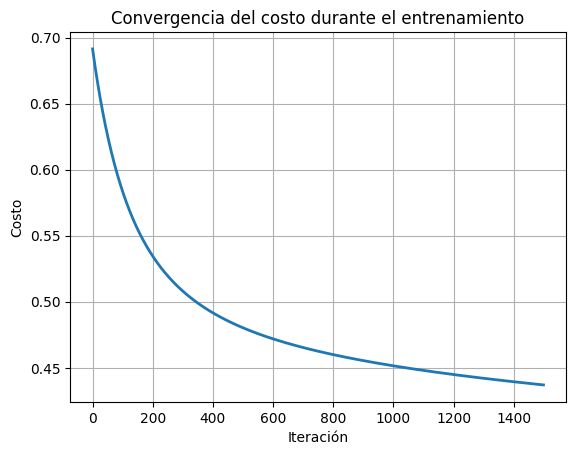

In [6]:
# Inicialización de parámetros
n_features = X_train.shape[1]
w_init = np.zeros(n_features)
b_init = 0.0

# Entrenamiento
alpha = 0.01
num_iters = 1500
w_trained, b_trained, cost_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters, print_cost=True)

# Gráfica de convergencia del costo
plt.plot(cost_hist, linewidth=2)
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.title('Convergencia del costo durante el entrenamiento')
plt.grid(True)
plt.show()

**Análisis de convergencia:**

- El costo disminuye de manera estable, lo que indica que el descenso de gradiente está funcionando correctamente.
- Si el costo oscila o aumenta, se recomienda reducir el valor de $\alpha$ (tasa de aprendizaje).
- La convergencia suave y la ausencia de saltos abruptos sugieren que no hay problemas numéricos ni errores de implementación.

# 8. Evaluación del Modelo

Se implementan manualmente las métricas de accuracy, precision, recall, f1-score y la matriz de confusión. Se reportan los resultados en train y test.

In [7]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-8)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-8)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-8)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

# Predicciones
y_train_pred = predict(w_trained, b_trained, X_train)
y_test_pred = predict(w_trained, b_trained, X_test)

# Métricas
print("--- TRAIN ---")
print(f"Accuracy:  {accuracy(y_train, y_train_pred):.4f}")
print(f"Precision: {precision(y_train, y_train_pred):.4f}")
print(f"Recall:    {recall(y_train, y_train_pred):.4f}")
print(f"F1-score:  {f1_score(y_train, y_train_pred):.4f}")
print("Matriz de confusión (train):\n", confusion_matrix(y_train, y_train_pred))

print("\n--- TEST ---")
print(f"Accuracy:  {accuracy(y_test, y_test_pred):.4f}")
print(f"Precision: {precision(y_test, y_test_pred):.4f}")
print(f"Recall:    {recall(y_test, y_test_pred):.4f}")
print(f"F1-score:  {f1_score(y_test, y_test_pred):.4f}")
print("Matriz de confusión (test):\n", confusion_matrix(y_test, y_test_pred))

--- TRAIN ---
Accuracy:  0.7989
Precision: 0.7805
Recall:    0.7619
F1-score:  0.7711
Matriz de confusión (train):
 [[87 18]
 [20 64]]

--- TEST ---
Accuracy:  0.7654
Precision: 0.7576
Recall:    0.6944
F1-score:  0.7246
Matriz de confusión (test):
 [[37  8]
 [11 25]]


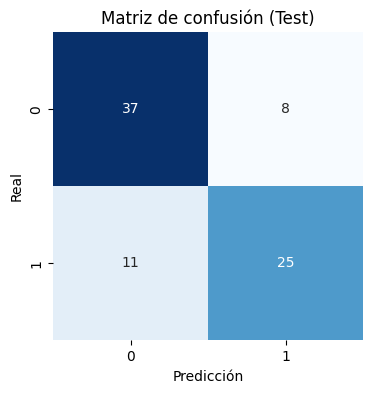

In [8]:
# Visualización de la matriz de confusión para test
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (Test)')
plt.show()

# 9. Visualización de Fronteras de Decisión

Para interpretar el comportamiento del modelo, se entrena y visualiza la frontera de decisión en al menos 3 pares de variables. Esto permite analizar la capacidad de separación y la influencia de cada par de características.

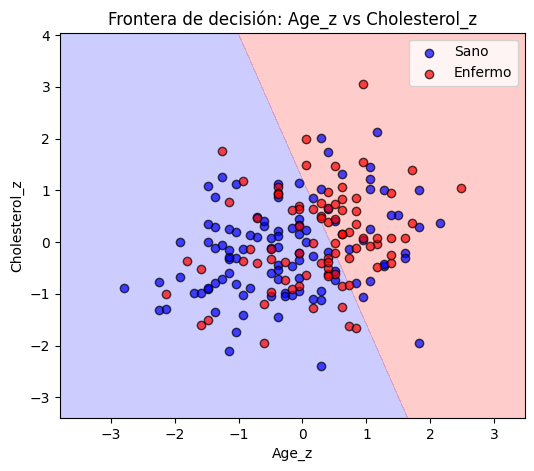

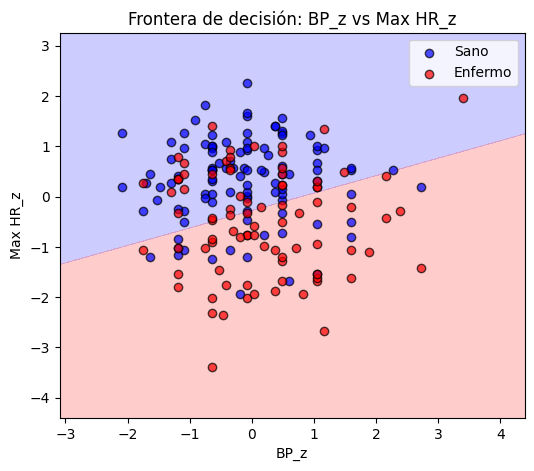

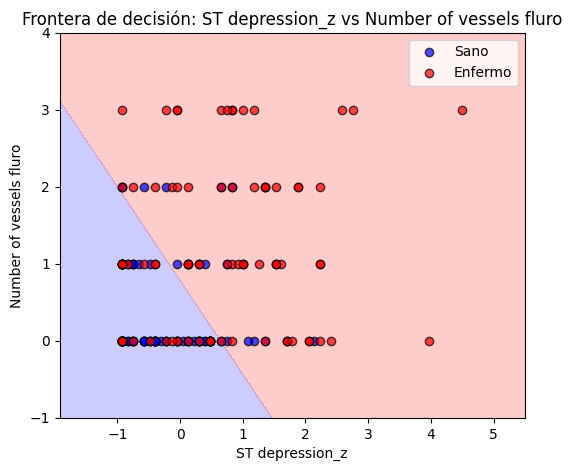

In [9]:
def plot_decision_boundary(X, y, w, b, feature_names, title):
    # Solo para 2D
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = sigmoid(grid @ w + b).reshape(xx.shape)
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, zz, levels=[0,0.5,1], alpha=0.2, colors=['blue','red'])
    plt.scatter(X[y==0,0], X[y==0,1], c='blue', label='Sano', edgecolor='k', alpha=0.7)
    plt.scatter(X[y==1,0], X[y==1,1], c='red', label='Enfermo', edgecolor='k', alpha=0.7)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()
    plt.show()

# Pares de variables a analizar
pairs = [
    ('Age_z', 'Cholesterol_z'),
    ('BP_z', 'Max HR_z'),
    ('ST depression_z', 'Number of vessels fluro')
]

for f1, f2 in pairs:
    idx1 = final_vars.index(f1)
    idx2 = final_vars.index(f2)
    X_pair = X_train[:, [idx1, idx2]]
    w_init2 = np.zeros(2)
    b_init2 = 0.0
    w2, b2, _ = gradient_descent(X_pair, y_train, w_init2, b_init2, alpha=0.01, num_iters=1000)
    plot_decision_boundary(X_pair, y_train, w2, b2, [f1, f2], f'Frontera de decisión: {f1} vs {f2}')

**Interpretación:**

- Las fronteras de decisión muestran la capacidad del modelo para separar ambas clases en el espacio de cada par de variables.
- Pares con mayor separación visual suelen aportar más poder predictivo.
- Si la frontera es casi lineal y separa bien, el modelo es adecuado para ese par; si es difusa, puede indicar solapamiento o baja relevancia de esas variables.

# 10. Regularización L2

Se modifica la función de costo y gradientes para incluir regularización L2. Se evalúan diferentes valores de $\lambda$ y se comparan métricas y norma de los pesos.

**Modificaciones matemáticas:**

- **Función de costo regularizada:**
  \[
  J_{L2}(w, b) = J(w, b) + \frac{\lambda}{2m} \|w\|^2
  \]
- **Gradiente regularizado:**
  \[
  \frac{\partial J_{L2}}{\partial w} = \frac{\partial J}{\partial w} + \frac{\lambda}{m} w
  \]
  El sesgo $b$ no se regulariza.

In [10]:
def compute_cost_l2(w, b, X, y, lmbda):
    m = X.shape[0]
    cost = compute_cost(w, b, X, y)
    reg = (lmbda / (2 * m)) * np.sum(w ** 2)
    return cost + reg

def compute_gradient_l2(w, b, X, y, lmbda):
    m = X.shape[0]
    dw, db = compute_gradient(w, b, X, y)
    dw += (lmbda / m) * w
    return dw, db

def gradient_descent_l2(X, y, w_init, b_init, alpha, lmbda, num_iters):
    w = w_init.copy()
    b = b_init
    cost_history = []
    for i in range(num_iters):
        dw, db = compute_gradient_l2(w, b, X, y, lmbda)
        w -= alpha * dw
        b -= alpha * db
        cost = compute_cost_l2(w, b, X, y, lmbda)
        cost_history.append(cost)
    return w, b, cost_history

In [11]:
# Evaluación para diferentes valores de lambda
lambdas = [0, 0.001, 0.01, 0.1, 1]
results = []
for lmbda in lambdas:
    w_l2, b_l2, cost_hist_l2 = gradient_descent_l2(X_train, y_train, np.zeros(n_features), 0.0, alpha, lmbda, num_iters)
    y_train_pred_l2 = predict(w_l2, b_l2, X_train)
    y_test_pred_l2 = predict(w_l2, b_l2, X_test)
    res = {
        'lambda': lmbda,
        'train_acc': accuracy(y_train, y_train_pred_l2),
        'test_acc': accuracy(y_test, y_test_pred_l2),
        'train_f1': f1_score(y_train, y_train_pred_l2),
        'test_f1': f1_score(y_test, y_test_pred_l2),
        'weight_norm': np.linalg.norm(w_l2),
        'cost_hist': cost_hist_l2
    }
    results.append(res)
    print(f"λ={lmbda:.3f} | Train F1: {res['train_f1']:.3f} | Test F1: {res['test_f1']:.3f} | ||w||={res['weight_norm']:.2f}")

# Tabla resumen
import pandas as pd
results_df = pd.DataFrame(results)
display(results_df[['lambda','train_acc','test_acc','train_f1','test_f1','weight_norm']])

λ=0.000 | Train F1: 0.771 | Test F1: 0.725 | ||w||=1.34
λ=0.001 | Train F1: 0.771 | Test F1: 0.725 | ||w||=1.34
λ=0.010 | Train F1: 0.771 | Test F1: 0.725 | ||w||=1.34
λ=0.100 | Train F1: 0.771 | Test F1: 0.725 | ||w||=1.34
λ=1.000 | Train F1: 0.764 | Test F1: 0.714 | ||w||=1.31


,lambda,train_acc,test_acc,train_f1,test_f1,weight_norm
0,0.000,0.798942,0.765432,0.771084,0.724638,1.344217
1,0.001,0.798942,0.765432,0.771084,0.724638,1.344179
2,0.010,0.798942,0.765432,0.771084,0.724638,1.343840
3,0.100,0.798942,0.765432,0.771084,0.724638,1.340452
4,1.000,0.793651,0.753086,0.763636,0.714286,1.307542


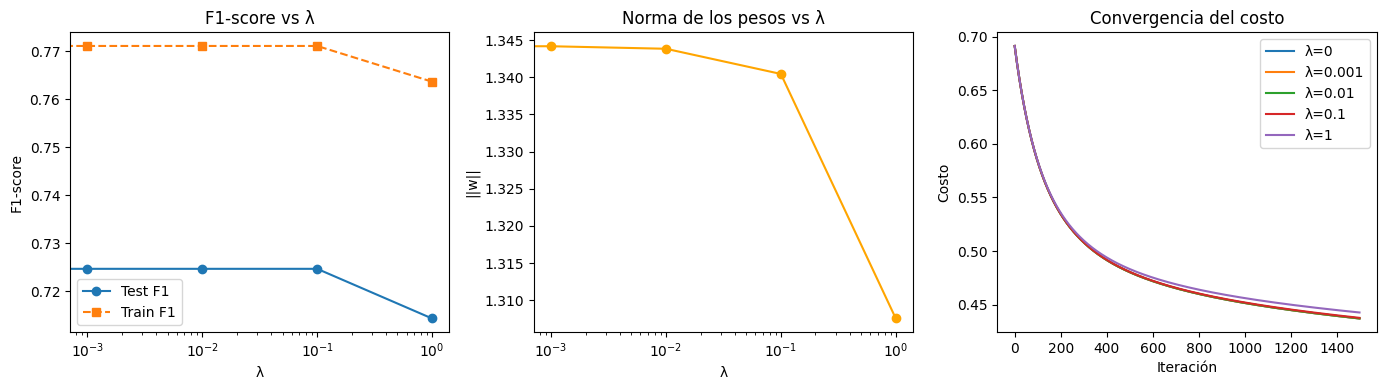

In [12]:
# Gráficas comparativas
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(lambdas, [r['test_f1'] for r in results], 'o-', label='Test F1')
plt.plot(lambdas, [r['train_f1'] for r in results], 's--', label='Train F1')
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('F1-score')
plt.title('F1-score vs λ')
plt.legend()

plt.subplot(1,3,2)
plt.plot(lambdas, [r['weight_norm'] for r in results], 'o-', color='orange')
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('||w||')
plt.title('Norma de los pesos vs λ')

plt.subplot(1,3,3)
for r in results:
    plt.plot(r['cost_hist'], label=f"λ={r['lambda']}")
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.title('Convergencia del costo')
plt.legend()
plt.tight_layout()
plt.show()

**Justificación del λ óptimo:**

- El valor óptimo de $\lambda$ es aquel que maximiza el F1-score en test y mantiene la norma de los pesos controlada.
- Valores muy altos de $\lambda$ causan underfitting (bajo F1 y pesos cercanos a cero).
- Valores muy bajos pueden llevar a overfitting (alta varianza y pesos grandes).
- Se recomienda elegir el $\lambda$ que logre el mejor equilibrio entre generalización y complejidad del modelo.

# 11. Exportación del Modelo

Se guardan los parámetros entrenados (pesos y sesgo) en archivos `.npy` y se muestra un ejemplo de carga y predicción manual.

In [13]:
# Seleccionamos el mejor modelo según test_f1
best_idx = np.argmax(results_df['test_f1'])
w_best = gradient_descent_l2(X_train, y_train, np.zeros(n_features), 0.0, alpha, results_df.loc[best_idx, 'lambda'], num_iters)[0]
b_best = gradient_descent_l2(X_train, y_train, np.zeros(n_features), 0.0, alpha, results_df.loc[best_idx, 'lambda'], num_iters)[1]

np.save('weights.npy', w_best)
np.save('bias.npy', np.array([b_best]))

# Ejemplo de carga y predicción
w_loaded = np.load('weights.npy')
b_loaded = np.load('bias.npy')[0]

# Predicción para un ejemplo aleatorio
ejemplo = X_test[0]
proba = sigmoid(np.dot(ejemplo, w_loaded) + b_loaded)
pred = int(proba >= 0.5)
print(f"Probabilidad predicha: {proba:.3f} | Clase predicha: {pred}")

Probabilidad predicha: 0.374 | Clase predicha: 0


# 12. Simulación de Despliegue en Amazon SageMaker

Se simula un endpoint de inferencia local que recibe datos en formato JSON, normaliza la entrada y devuelve la probabilidad de riesgo. Se explica cómo migrar este flujo a AWS SageMaker.

In [14]:
import json

def endpoint_simulado(input_json, w, b, mu, sigma):
    """Simula un endpoint de inferencia tipo SageMaker."""
    # input_json: dict con variables originales (no normalizadas)
    # w, b: parámetros entrenados
    # mu, sigma: medias y desv. estándar usadas en normalización
    x_raw = np.array([
        input_json['Age'],
        input_json['Sex'],
        input_json['Chest pain type'],
        input_json['BP'],
        input_json['Cholesterol'],
        input_json['Max HR'],
        input_json['ST depression'],
        input_json['Number of vessels fluro']
    ], dtype=float)
    # Normalización manual
    x_norm = x_raw.copy()
    x_norm[0] = (x_raw[0] - mu[0]) / sigma[0]  # Age_z
    x_norm[3] = (x_raw[3] - mu[1]) / sigma[1]  # BP_z
    x_norm[4] = (x_raw[4] - mu[2]) / sigma[2]  # Cholesterol_z
    x_norm[5] = (x_raw[5] - mu[3]) / sigma[3]  # Max HR_z
    x_norm[6] = (x_raw[6] - mu[4]) / sigma[4]  # ST depression_z
    # El resto ya está en escala original
    proba = sigmoid(np.dot(x_norm, w) + b)
    return json.dumps({'risk_probability': float(proba)})

# Ejemplo de uso
mu = [df_prep['Age'].mean(), df_prep['BP'].mean(), df_prep['Cholesterol'].mean(), df_prep['Max HR'].mean(), df_prep['ST depression'].mean()]
sigma = [df_prep['Age'].std(), df_prep['BP'].std(), df_prep['Cholesterol'].std(), df_prep['Max HR'].std(), df_prep['ST depression'].std()]

entrada = {
    "Age": 60,
    "Sex": 1,
    "Chest pain type": 4,
    "BP": 140,
    "Cholesterol": 300,
    "Max HR": 150,
    "ST depression": 2.0,
    "Number of vessels fluro": 1
}
print(endpoint_simulado(entrada, w_best, b_best, mu, sigma))

{"risk_probability": 0.7741257334236066}


**Migración a AWS SageMaker:**

- El script de inferencia debe empaquetarse como un archivo Python (`inference.py`) siguiendo la interfaz de SageMaker (`model_fn`, `input_fn`, `predict_fn`, `output_fn`).
- Los parámetros del modelo y las estadísticas de normalización deben exportarse y cargarse en el endpoint.
- La entrada y salida deben ser JSON.
- El flujo mostrado es directamente portable a un handler de SageMaker, cambiando solo la fuente de los datos y el entorno de ejecución.

# 13. Conclusiones y Trabajo Futuro

**Limitaciones:**
- El modelo es lineal y no captura relaciones no lineales complejas.
- El dataset es pequeño y puede no ser representativo de toda la población.
- No se realizó ajuste de hiperparámetros exhaustivo ni validación cruzada.

**Riesgos:**
- Sobreajuste si se usan demasiadas variables irrelevantes.
- Subajuste si la regularización es excesiva.
- Interpretación clínica limitada si no se consideran variables contextuales.

**Mejoras propuestas:**
- Incorporar validación cruzada y ajuste de hiperparámetros más fino.
- Probar modelos no lineales o ensamblados.
- Integrar explicabilidad (SHAP, LIME) para mayor confianza clínica.
- Desplegar en entorno real con monitoreo de desempeño.

**Aplicaciones reales:**
- Soporte a la decisión clínica en hospitales.
- Priorización de pacientes en campañas de prevención.
- Integración en sistemas de historia clínica electrónica.

Este trabajo demuestra la viabilidad de implementar modelos predictivos robustos y reproducibles desde cero, sentando las bases para desarrollos más avanzados y aplicaciones en salud digital.